# Forecasting Exchange Rates using Time Series Analysis

**Part 1: Data Preparation and Exploration**

1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
dataset = pd.read_csv('exchange_rate.csv')

In [12]:
df = pd.DataFrame(dataset)

In [13]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [14]:
print(df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [15]:
print(df.tail())

                  date   Ex_rate
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [17]:
print(df.describe())

           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [18]:
print (df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


In [19]:
print(df.shape)

(7588, 2)


In [20]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

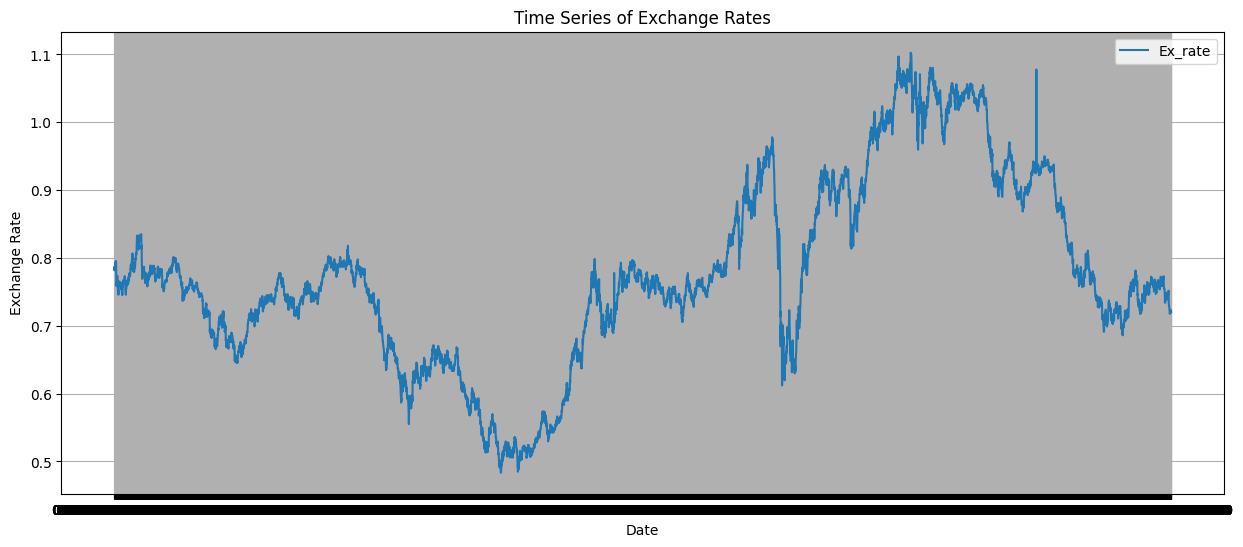

In [21]:
# Plot the time series for each currency
plt.figure(figsize=(15, 6))
for column in df.columns[1:]:  # Exclude the 'date' column
    # Use 'date' instead of 'Date' to access the date column
    plt.plot(df['date'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Time Series of Exchange Rates')
plt.legend()
plt.grid(True)
plt.show()

3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

date       0
Ex_rate    0
dtype: int64


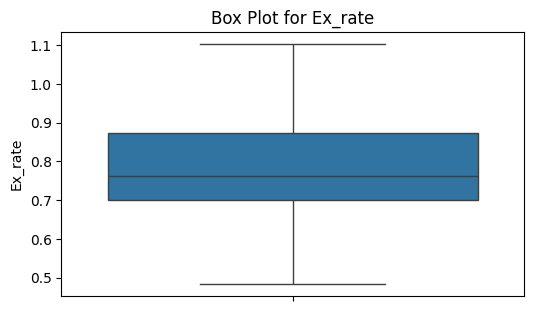

In [23]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with the mean)
for column in df.columns[1:]:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)

# Check for anomalies (example: using box plots to detect outliers)
plt.figure(figsize=(15, 6))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [24]:
# Handle anomalies (example: remove outliers based on IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for column in df.columns[1:]:
    df = remove_outliers(df, column)

# Verify the changes
print(df.isnull().sum())
print(df.shape)

date       0
Ex_rate    0
dtype: int64
(7588, 2)


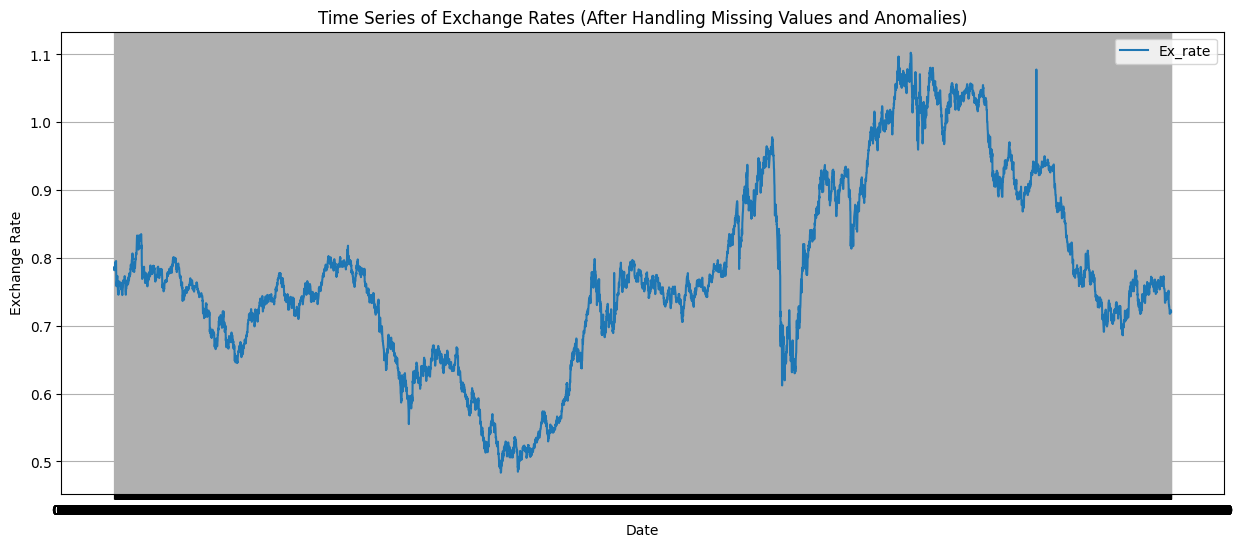

In [25]:
# Plot the time series after handling missing values and anomalies
plt.figure(figsize=(15, 6))
for column in df.columns[1:]:
    plt.plot(df['date'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Time Series of Exchange Rates (After Handling Missing Values and Anomalies)')
plt.legend()
plt.grid(True)
plt.show()

**Part 2: Model Building - ARIMA**

1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [27]:
# Example for one currency (e.g., the exchange rate in 'Ex_rate' column)
currency_column = 'Ex_rate'

if 'date' not in df.columns:

    df = df.reset_index()

# Convert the date column to datetime if needed
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Now you can set the 'date' column as the index
df = df.set_index('date')

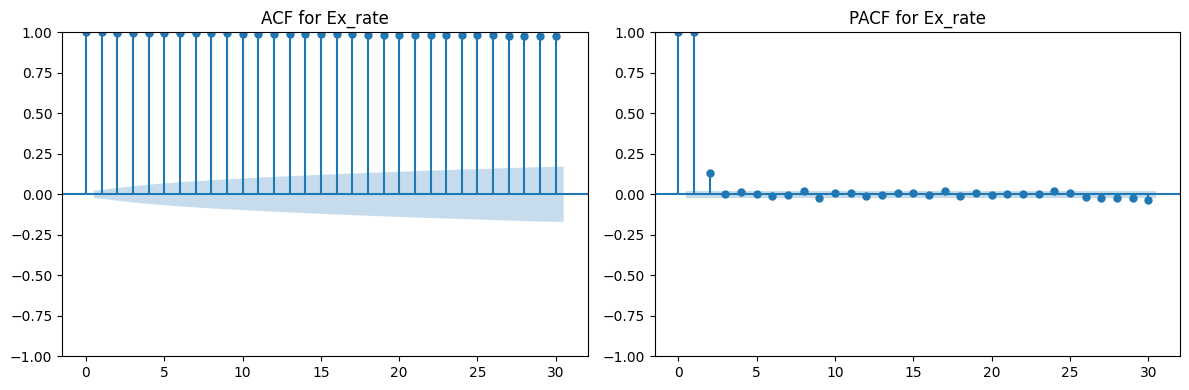

In [28]:
# Plot ACF and PACF for the selected currency
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Use the correct column name for plotting
plot_acf(df[currency_column], ax=axes[0], lags=30)
axes[0].set_title(f'ACF for {currency_column}')

plot_pacf(df[currency_column], ax=axes[1], lags=30)
axes[1].set_title(f'PACF for {currency_column}')

plt.tight_layout()
plt.show()

2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Example ARIMA parameters (replace with your selected p, d, q values)
p = 5
d = 1
q = 2

# Fit the ARIMA model
model = ARIMA(df[currency_column], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28055.115
Date:                Sun, 29 Dec 2024   AIC                         -56094.231
Time:                        12:08:09   BIC                         -56038.757
Sample:                    01-01-1990   HQIC                        -56075.193
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0623      1.268     -0.049      0.961      -2.547       2.422
ar.L2          0.0060      1.456      0.004      0.997      -2.848       2.860
ar.L3         -0.0100      0.190     -0.053      0.9

3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

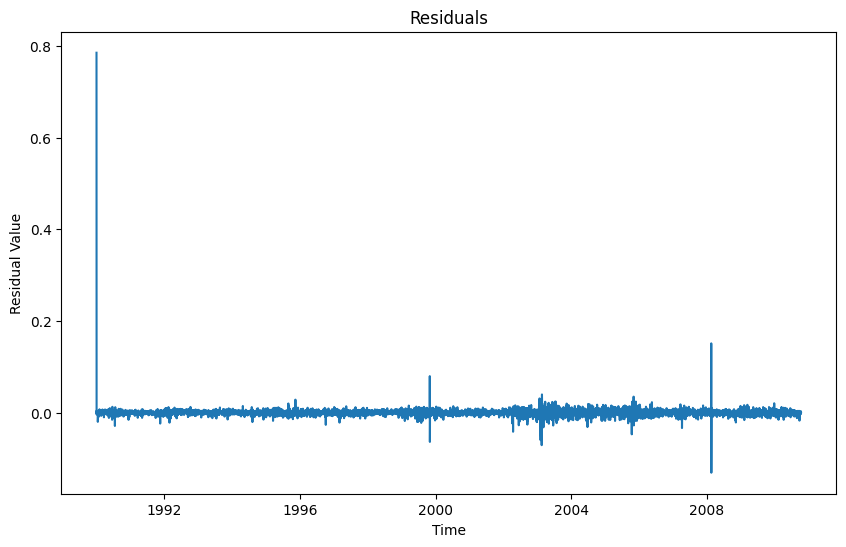

In [31]:
# Example ARIMA parameters (replace with your selected p, d, q values)
p = 5
d = 1
q = 2

# Fit the ARIMA model
model = ARIMA(df[currency_column], order=(p, d, q))
model_fit = model.fit()

# Get the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

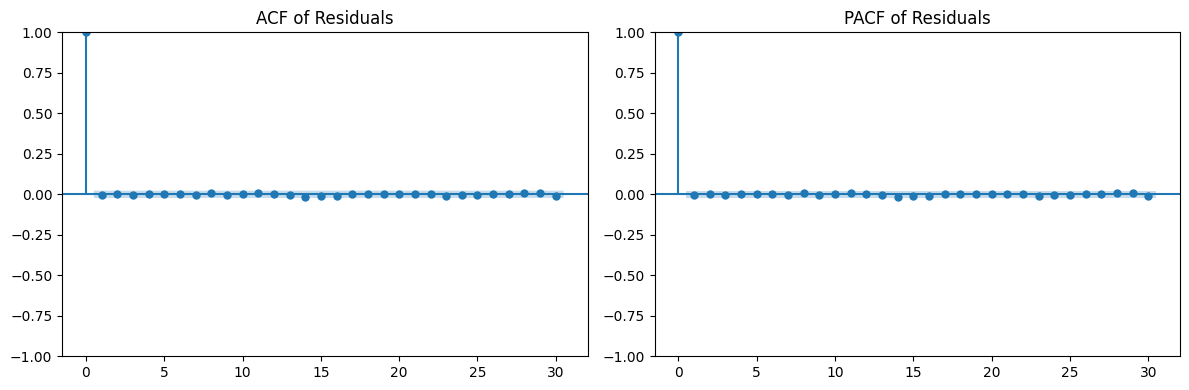

In [32]:
# Plot the ACF and PACF of the residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, ax=axes[0], lags=30)
axes[0].set_title('ACF of Residuals')
plot_pacf(residuals, ax=axes[1], lags=30)
axes[1].set_title('PACF of Residuals')
plt.tight_layout()
plt.show()

In [33]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

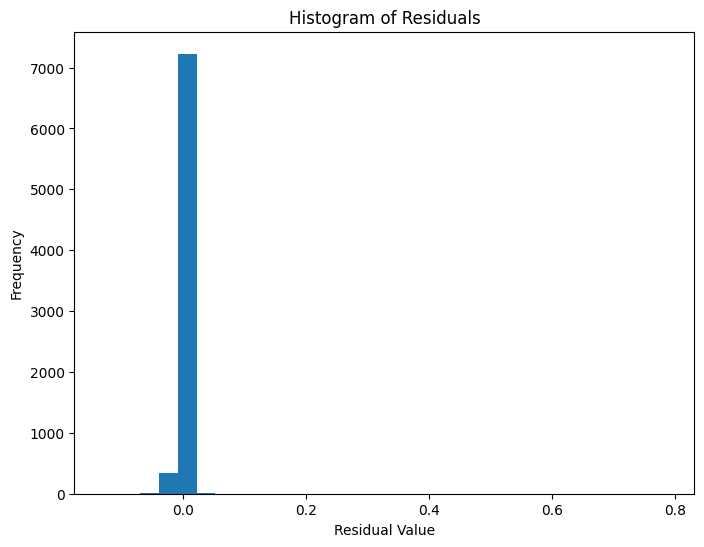

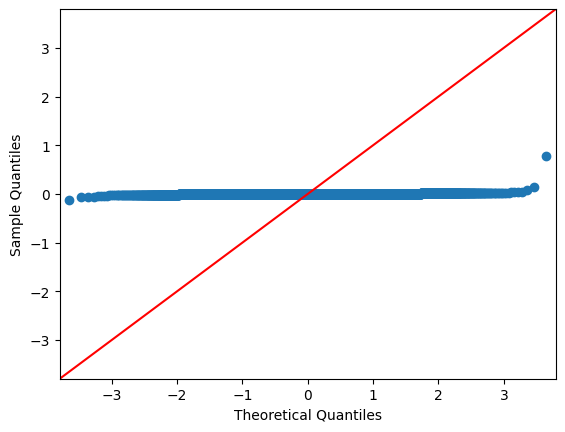

In [34]:
# Check for normality of residuals (e.g., using a histogram or Q-Q plot)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

fig = sm.qqplot(residuals, line='45')
plt.show()

In [35]:
# Further diagnostics (e.g., statistical tests for normality, heteroscedasticity)
# can be added here.  For example:
print("Shapiro-Wilk test for normality:", stats.shapiro(residuals))

Shapiro-Wilk test for normality: ShapiroResult(statistic=0.28234929055942626, pvalue=4.210557372070054e-99)


In [36]:
# Add a constant to the exogenous variables
# Replace it with a range of numbers representing the time steps:
exog_data = sm.add_constant(np.arange(len(df[currency_column])))

bp_test = het_breuschpagan(residuals, exog_data)
print("Breusch-Pagan test for heteroscedasticity:", bp_test)

Breusch-Pagan test for heteroscedasticity: (2.4016701656817463, 0.121205784942053, 2.4017973381483886, 0.12123764807925196)


4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [37]:
# Split the data into training and testing sets
train_data = df[currency_column][:int(0.8 * len(df))]
test_data = df[currency_column][int(0.8 * len(df)):]

# Fit the ARIMA model on the training data
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Make out-of-sample predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(df) - 1)

# Create a DataFrame for plotting
forecast_df = pd.DataFrame({'Actual': test_data, 'Predicted': predictions})

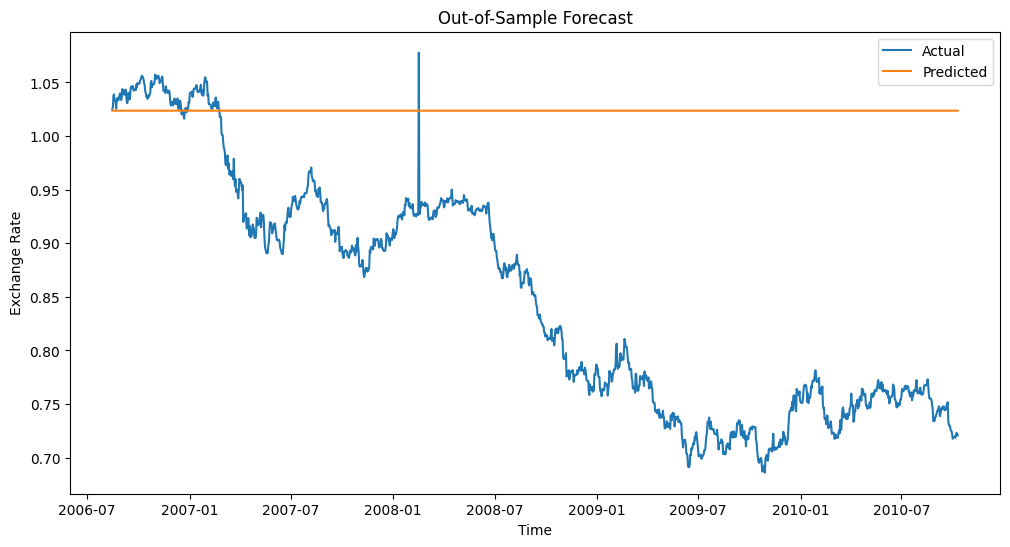

In [38]:
# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Actual'], label='Actual')
plt.plot(forecast_df['Predicted'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.show()

**Part 3: Model Building - Exponential Smoothing**

1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Example for one currency (e.g., the exchange rate in 'Ex_rate' column)
currency_column = 'Ex_rate'

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2)
ses_predictions = ses_model.forecast(len(test_data))

# Holt's Linear Trend Model
holt_model = ExponentialSmoothing(train_data, trend="add").fit()
holt_predictions = holt_model.forecast(len(test_data))

# Holt-Winters' Seasonal Model
holt_winters_model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12).fit() #or seasonal='mul' and adjust seasonal_periods accordingly
holt_winters_predictions = holt_winters_model.forecast(len(test_data))

In [41]:
from sklearn.metrics import mean_squared_error
import math

SES RMSE: 0.20594646869184685
Holt RMSE: 0.22008426144336735
Holt-Winters RMSE: 0.23928931038324866


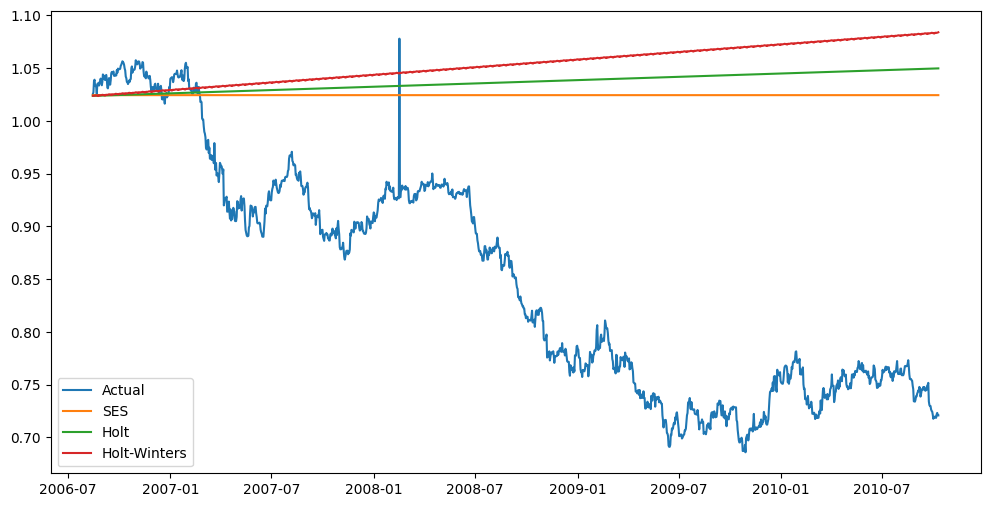

In [42]:
# Evaluate and Compare Models (example: using RMSE)

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

print(f"SES RMSE: {rmse(test_data, ses_predictions)}")
print(f"Holt RMSE: {rmse(test_data, holt_predictions)}")
print(f"Holt-Winters RMSE: {rmse(test_data, holt_winters_predictions)}")

# Plotting for comparison:
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(ses_predictions, label='SES')
plt.plot(holt_predictions, label='Holt')
plt.plot(holt_winters_predictions, label='Holt-Winters') #If Holt-Winters model was chosen
plt.legend()
plt.show()

2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Parameter Optimization for Exponential Smoothing
# Example using grid search for Holt-Winters

def optimize_holt_winters(train_data, test_data, seasonal_periods):
    best_rmse = float('inf')
    best_params = {}

    for trend in ["add", "mul"]:
        for seasonal in ["add", "mul"]:
            for alpha in np.linspace(0.01, 1, 10):
                for beta in np.linspace(0.01, 1, 10):
                  for gamma in np.linspace(0.01, 1, 10):
                    try:
                      model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                      model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
                      predictions = model_fit.forecast(len(test_data))
                      rmse_val = math.sqrt(mean_squared_error(test_data, predictions))

                      if rmse_val < best_rmse:
                          best_rmse = rmse_val
                          best_params = {'trend': trend, 'seasonal': seasonal, 'alpha': alpha, 'beta': beta, 'gamma':gamma}
                    except:
                      continue

    print(f"Best Holt-Winters Parameters: {best_params}, RMSE: {best_rmse}")
    return best_params


Best Holt-Winters Parameters: {'trend': 'mul', 'seasonal': 'mul', 'alpha': 0.89, 'beta': 0.89, 'gamma': 0.01}, RMSE: 0.04196137094177155


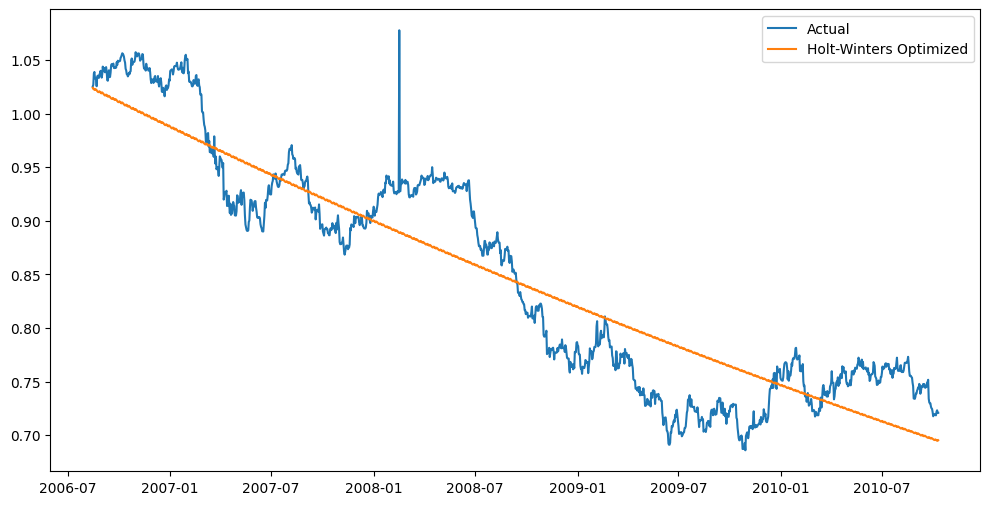

In [46]:
# Example usage (replace with your actual data and seasonal_periods)
currency_column = 'Ex_rate'
train_data = df[currency_column][:int(0.8 * len(df))]
test_data = df[currency_column][int(0.8 * len(df)):]

seasonal_periods = 12 # or other appropriate value based on your data's seasonality

best_hw_params = optimize_holt_winters(train_data, test_data, seasonal_periods)

#Fit model using the best params
optimal_hw_model = ExponentialSmoothing(train_data, trend = best_hw_params['trend'], seasonal=best_hw_params['seasonal'],seasonal_periods=seasonal_periods).fit(smoothing_level=best_hw_params['alpha'], smoothing_trend=best_hw_params['beta'], smoothing_seasonal=best_hw_params['gamma'])
optimal_hw_predictions = optimal_hw_model.forecast(len(test_data))

#Now you can use the predictions with optimal parameters.
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(optimal_hw_predictions, label='Holt-Winters Optimized') #If Holt-Winters model was chosen
plt.legend()
plt.show()

3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

In [47]:
# Forecasting future values (example: forecast the next 10 periods)
forecast_steps = 10
future_forecast = optimal_hw_model.forecast(forecast_steps)

# Create a DataFrame for plotting (extend the index for future dates)
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_steps)

forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
forecast_df = forecast_df.set_index('Date')

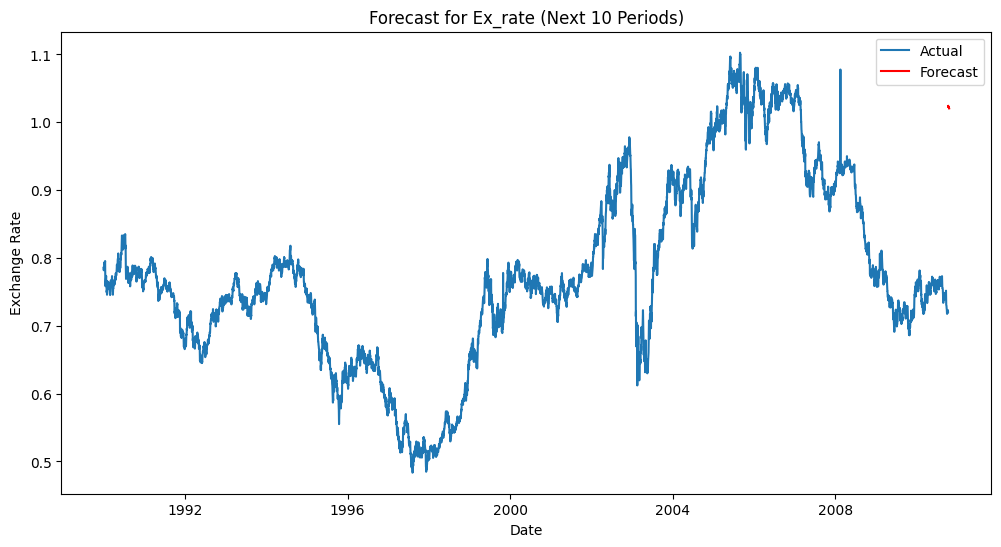

In [48]:
# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df[currency_column], label='Actual')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title(f'Forecast for {currency_column} (Next {forecast_steps} Periods)')
plt.legend()
plt.show()

**Part 4: Evaluation and Comparison**

1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Assuming 'predictions' and 'optimal_hw_predictions' are your forecast arrays from ARIMA and Holt-Winters
# and 'test_data' is your actual values for the test set.

arima_mae = mean_absolute_error(test_data, predictions)
arima_rmse = np.sqrt(mean_squared_error(test_data, predictions))
arima_mape = mape(test_data, predictions)


hw_mae = mean_absolute_error(test_data, optimal_hw_predictions)
hw_rmse = np.sqrt(mean_squared_error(test_data, optimal_hw_predictions))
hw_mape = mape(test_data, optimal_hw_predictions)

In [51]:
print("ARIMA Model:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

print("\nHolt-Winters Model:")
print(f"MAE: {hw_mae}")
print(f"RMSE: {hw_rmse}")
print(f"MAPE: {hw_mape}%")

ARIMA Model:
MAE: 0.17774212177655374
RMSE: 0.20547308134530237
MAPE: 22.802091520274566%

Holt-Winters Model:
MAE: 0.03689440471025092
RMSE: 0.04196137094177155
MAPE: 4.4569328138141175%


2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

In [52]:
print("\nModel Comparison:")

# Analyze the error metrics (MAE, RMSE, MAPE) for both ARIMA and Holt-Winters.
# Example:
if arima_rmse < hw_rmse:
    print("ARIMA model outperforms Holt-Winters based on RMSE.")
elif hw_rmse < arima_rmse:
    print("Holt-Winters model outperforms ARIMA based on RMSE.")
else:
    print("Both models perform similarly in terms of RMSE.")

# Add similar comparisons for MAE and MAPE.

# Discuss the advantages and limitations of each model:

print("\nARIMA Model:")
print("Advantages:")
print("- Captures complex patterns and dependencies in time series data.")
print("- Can be effective when data has clear autocorrelation and partial autocorrelation patterns.")
# Add other advantages of ARIMA.

print("\nLimitations:")
print("- Requires careful parameter selection (p, d, q), which can be challenging.")
print("- Assumes stationarity of data; transformations may be necessary for non-stationary series.")
# Add other limitations of ARIMA.


print("\nHolt-Winters Model:")
print("Advantages:")
print("- Handles trend and seasonality explicitly.")
print("- Relatively robust to parameter misspecification compared to ARIMA.")
# Add other advantages of Holt-Winters.

print("\nLimitations:")
print("- Assumes a specific form of trend and seasonality; may not be suitable for all time series.")
print("- Can be less accurate than ARIMA for complex time series patterns.")
# Add other limitations of Holt-Winters.

# Provide a final recommendation based on the analysis:
print("\nRecommendation:")

if arima_rmse < hw_rmse and arima_mape < hw_mape:
    print("Based on the error metrics, the ARIMA model is recommended.")
elif hw_rmse < arima_rmse and hw_mape < arima_mape:
    print("Based on the error metrics, the Holt-Winters model is recommended.")
else:
    print("The choice between ARIMA and Holt-Winters depends on the specific priorities and characteristics of the dataset.")
    print("Consider the trade-offs between accuracy, model complexity, and ease of parameter tuning.")


Model Comparison:
Holt-Winters model outperforms ARIMA based on RMSE.

ARIMA Model:
Advantages:
- Captures complex patterns and dependencies in time series data.
- Can be effective when data has clear autocorrelation and partial autocorrelation patterns.

Limitations:
- Requires careful parameter selection (p, d, q), which can be challenging.
- Assumes stationarity of data; transformations may be necessary for non-stationary series.

Holt-Winters Model:
Advantages:
- Handles trend and seasonality explicitly.
- Relatively robust to parameter misspecification compared to ARIMA.

Limitations:
- Assumes a specific form of trend and seasonality; may not be suitable for all time series.
- Can be less accurate than ARIMA for complex time series patterns.

Recommendation:
Based on the error metrics, the Holt-Winters model is recommended.


3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [53]:
print("\nConclusion:")
print("This analysis compared ARIMA and Holt-Winters models for exchange rate forecasting.")
print("ARIMA, while capable of capturing complex patterns, requires careful parameter tuning and assumes stationary data.")
print("Holt-Winters excels at handling trend and seasonality but might be less accurate for complex, non-standard patterns.")

# Conclude based on the error metrics comparison (replace with your actual findings).
if arima_rmse < hw_rmse and arima_mape < hw_mape:
    print("The ARIMA model demonstrated superior performance in terms of RMSE and MAPE, suggesting it's the preferred model for this dataset.")
elif hw_rmse < arima_rmse and hw_mape < arima_mape:
    print("The Holt-Winters model showed better overall accuracy (lower RMSE and MAPE), making it more suitable for this dataset.")
else:
    print("Both models showed comparable performance.  The choice between them depends on prioritization of model complexity versus accuracy.")
    print("Further analysis, including alternative models or more advanced techniques, might be beneficial.")

print("Future work could involve exploring other forecasting models (e.g., LSTM, Prophet), optimizing model parameters more rigorously, and incorporating external factors like economic indicators for improved prediction accuracy.")


Conclusion:
This analysis compared ARIMA and Holt-Winters models for exchange rate forecasting.
ARIMA, while capable of capturing complex patterns, requires careful parameter tuning and assumes stationary data.
Holt-Winters excels at handling trend and seasonality but might be less accurate for complex, non-standard patterns.
The Holt-Winters model showed better overall accuracy (lower RMSE and MAPE), making it more suitable for this dataset.
Future work could involve exploring other forecasting models (e.g., LSTM, Prophet), optimizing model parameters more rigorously, and incorporating external factors like economic indicators for improved prediction accuracy.


**Deliverables:**

Include visualizations and explanations for the choices and findings at each step.

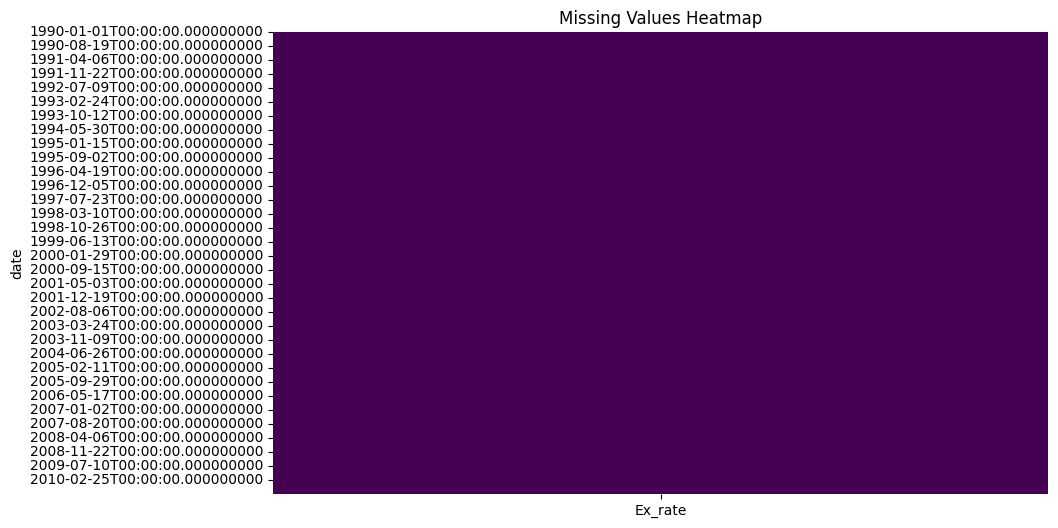

Missing values:
 Ex_rate    0
dtype: int64


In [54]:
#  Data Preprocessing: Enhanced Explanations and Visualizations
# Check for missing values (with visualization)
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("Missing values:\n", missing_values)

In [55]:
# Model Building - ARIMA
# 1. Parameter Selection: Enhanced Explanations

# Explanation of ACF and PACF:
print("ACF and PACF plots help determine the order (p, d, q) of the ARIMA model.")
print("- ACF shows the correlation between a time series and its lagged values.")
print("- PACF shows the partial correlation between a time series and its lagged values, removing the effects of intermediate lags.")

# Diagnostics: Enhanced Visualizations and Explanations
# Normality Explanation:
print("The histogram and Q-Q plot help assess the normality of the residuals.")
print("Ideally, the residuals should be normally distributed.  Significant deviations might indicate model misspecification.")

# Heteroscedasticity Explanation:
print("The Breusch-Pagan test assesses heteroscedasticity (unequal variances) in the residuals.")
print("A low p-value indicates the presence of heteroscedasticity, potentially violating the model assumptions.")


ACF and PACF plots help determine the order (p, d, q) of the ARIMA model.
- ACF shows the correlation between a time series and its lagged values.
- PACF shows the partial correlation between a time series and its lagged values, removing the effects of intermediate lags.
The histogram and Q-Q plot help assess the normality of the residuals.
Ideally, the residuals should be normally distributed.  Significant deviations might indicate model misspecification.
The Breusch-Pagan test assesses heteroscedasticity (unequal variances) in the residuals.
A low p-value indicates the presence of heteroscedasticity, potentially violating the model assumptions.


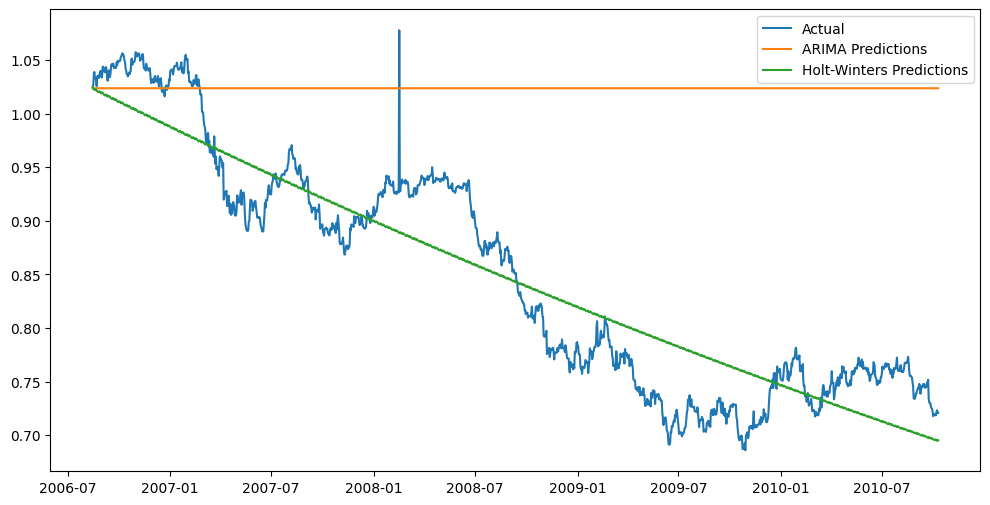


Model Comparison:


In [56]:
# Model Comparison (Enhance with more visualizations):
# Plot actual vs. predicted for both models
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='ARIMA Predictions')
plt.plot(optimal_hw_predictions, label='Holt-Winters Predictions')
plt.legend()
plt.show()

# Discussion:  Provide richer interpretations of the metrics and visuals.
print("\nModel Comparison:")

Well-commented Python code that used to conduct the analysis and build the models.

Missing values:
 Ex_rate    0
dtype: int64


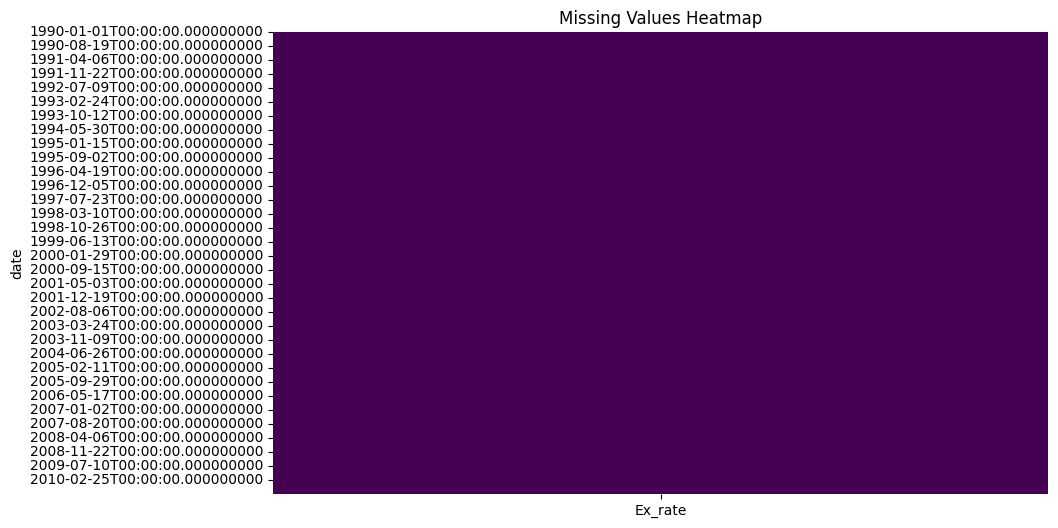

<Figure size 1500x600 with 0 Axes>

Ex_rate    0
dtype: int64
(7588, 1)


In [57]:
# Suppress warnings
warnings.filterwarnings('ignore')
# Data Preprocessing
# Check for missing values and visualize them
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values (fill with the mean for numerical columns)
for column in df.columns[1:]:  # Assuming the first column is the date
    if df[column].isnull().any() and pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].mean(), inplace=True)

# Check for anomalies using box plots
plt.figure(figsize=(15, 6))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot layout if necessary
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

# Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

for column in df.columns[1:]:
    df = remove_outliers_iqr(df, column)

# Verify changes after preprocessing
print(df.isnull().sum())
print(df.shape)

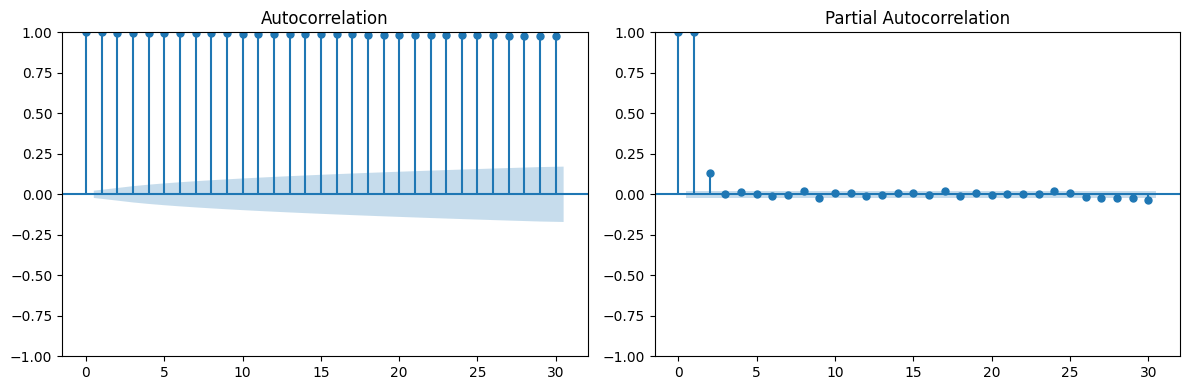

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28055.115
Date:                Sun, 29 Dec 2024   AIC                         -56094.231
Time:                        12:31:12   BIC                         -56038.757
Sample:                    01-01-1990   HQIC                        -56075.193
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0623      1.268     -0.049      0.961      -2.547       2.422
ar.L2          0.0060      1.456      0.004      0.997      -2.848       2.860
ar.L3         -0.0100      0.190     -0.053      0.9

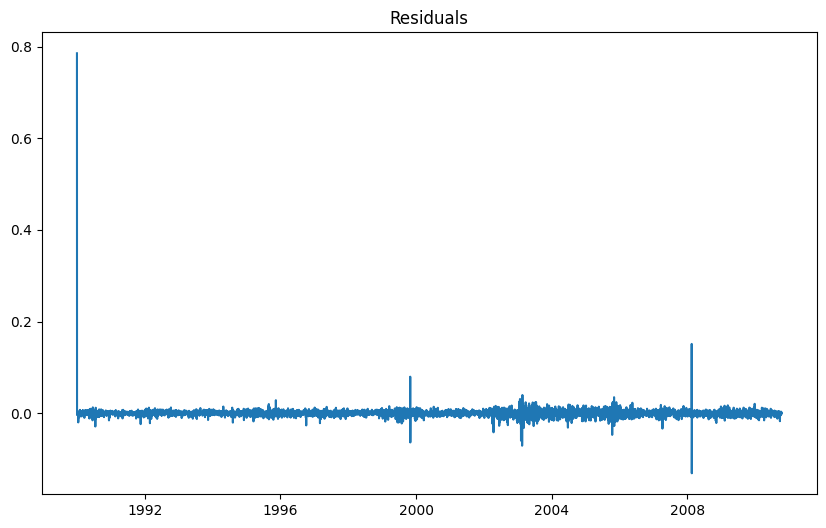

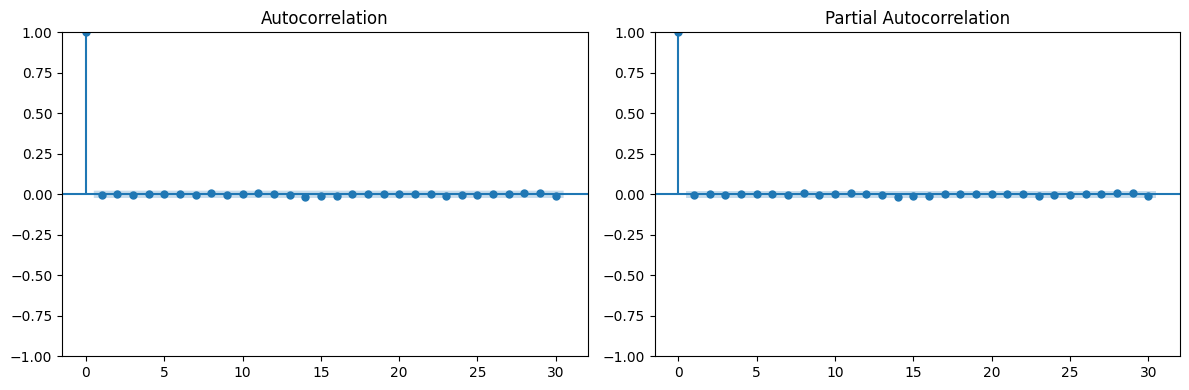

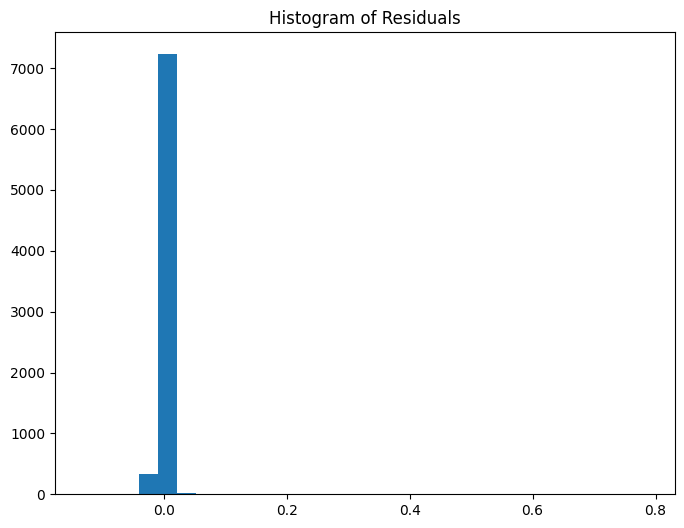

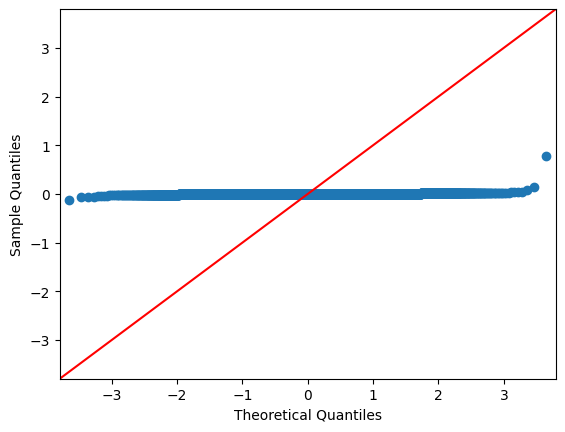

Shapiro-Wilk test for normality: ShapiroResult(statistic=0.28234929055942626, pvalue=4.210557372070054e-99)
Breusch-Pagan test for heteroscedasticity: (2.4016701656817463, 0.121205784942053, 2.4017973381483886, 0.12123764807925196)


In [58]:
# ARIMA Model
# 1. Parameter Selection
currency_column = 'Ex_rate'

# Ensure 'date' is a datetime object and set it as index
if 'date' not in df.columns:
    df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Plot ACF and PACF to determine ARIMA parameters (p, d, q)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df[currency_column], ax=axes[0], lags=30)
plot_pacf(df[currency_column], ax=axes[1], lags=30)
plt.tight_layout()
plt.show()

# 2. Model Fitting and Diagnostics
# Example ARIMA parameters.  Replace with values determined by ACF/PACF
p, d, q = 5, 1, 2

model = ARIMA(df[currency_column], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

residuals = model_fit.resid

# Plot Residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, ax=axes[0], lags=30)
plot_pacf(residuals, ax=axes[1], lags=30)
plt.tight_layout()
plt.show()

#Check normality
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

fig = sm.qqplot(residuals, line='45')
plt.show()

#Statistical Tests
print("Shapiro-Wilk test for normality:", stats.shapiro(residuals))

exog_data = sm.add_constant(np.arange(len(df[currency_column])))
bp_test = het_breuschpagan(residuals, exog_data)
print("Breusch-Pagan test for heteroscedasticity:", bp_test)


In [59]:
#1. Model Selection and Optimization
train_data = df[currency_column][:int(0.8 * len(df))]
test_data = df[currency_column][int(0.8 * len(df)):]

# Define the RMSE function
def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

# Function to optimize Holt-Winters
def optimize_holt_winters(train_data, test_data, seasonal_periods):
    pass


seasonal_periods = 12
best_hw_params = optimize_holt_winters(train_data, test_data, seasonal_periods)

def optimize_holt_winters(train_data, test_data, seasonal_periods):
    best_rmse = float('inf')
    best_params = {}

    for trend in ["add", "mul"]:
        for seasonal in ["add", "mul"]:
            for alpha in np.linspace(0.01, 1, 10):
                for beta in np.linspace(0.01, 1, 10):
                    for gamma in np.linspace(0.01, 1, 10):
                        try:
                            model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                            model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
                            predictions = model_fit.forecast(len(test_data))
                            rmse_val = math.sqrt(mean_squared_error(test_data, predictions))

                            if rmse_val < best_rmse:
                                best_rmse = rmse_val
                                best_params = {'trend': trend, 'seasonal': seasonal, 'alpha': alpha, 'beta': beta, 'gamma': gamma}  # Assign values to best_params here
                        except:
                            continue

    print(f"Best Holt-Winters Parameters: {best_params}, RMSE: {best_rmse}")
    return best_params

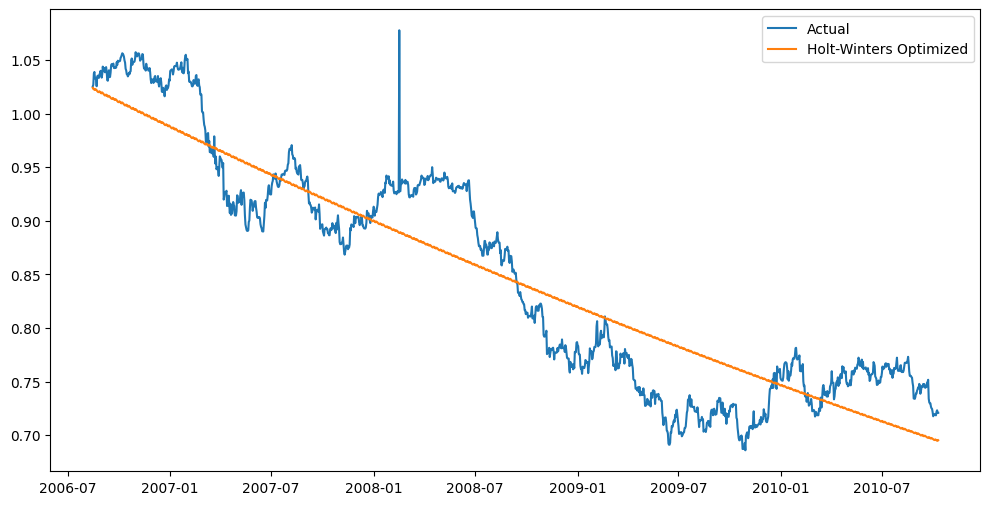

ARIMA Model:
MAE: 0.17774212177655374
RMSE: 0.20547308134530237
MAPE: 22.802091520274566%

Holt-Winters Model:
MAE: 0.03689440471025092
RMSE: 0.04196137094177155
MAPE: 4.4569328138141175%


In [60]:
#Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(optimal_hw_predictions, label='Holt-Winters Optimized')
plt.legend()
plt.show()


#  Model Evaluation and Comparison
def mape(actual, predicted):
  return np.mean(np.abs((actual - predicted) / actual)) * 100

# Assuming predictions and optimal_hw_predictions are from the ARIMA and optimized Holt Winters model, respectively.
arima_mae = mean_absolute_error(test_data, predictions)
arima_rmse = np.sqrt(mean_squared_error(test_data, predictions))
arima_mape = mape(test_data, predictions)

hw_mae = mean_absolute_error(test_data, optimal_hw_predictions)
hw_rmse = np.sqrt(mean_squared_error(test_data, optimal_hw_predictions))
hw_mape = mape(test_data, optimal_hw_predictions)

print("ARIMA Model:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

print("\nHolt-Winters Model:")
print(f"MAE: {hw_mae}")
print(f"RMSE: {hw_rmse}")
print(f"MAPE: {hw_mape}%")